######  Task Objective   
* From the given 'iris' dataset predict the optimim number of clusters and present it visually 

## 1. Loading Libraries 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## 2. Explore Dataset

In [2]:
#Read dataset
data=pd.read_csv('Iris.csv')

In [3]:
#format of dataset 
data.shape

(150, 6)

In [4]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#Columns Names 
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
#Datatype 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
#Categorical data 
cat_data=['Species']
#Numerical data  
num_data=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
#Id 
data_id=['Id']

In [31]:
#Check null data 
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [34]:
#checking duplicates 
data[data.duplicated()]




,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


No duplicates found 

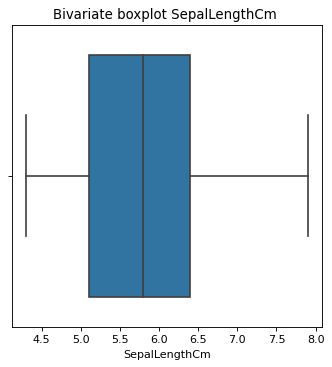

In [9]:
#Check outliers using outliers
plt.figure(figsize=(5,5),dpi=80)
sns.boxplot(x=data['SepalLengthCm'])
plt.title('Bivariate boxplot SepalLengthCm ')
plt.show() 

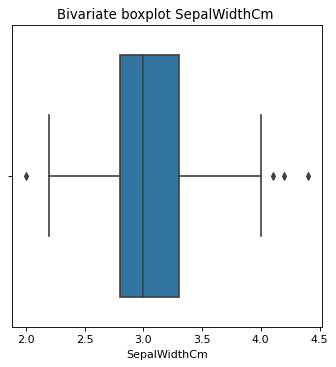

In [10]:
plt.figure(figsize=(5,5),dpi=80)
sns.boxplot(x=data['SepalWidthCm'])
plt.title('Bivariate boxplot SepalWidthCm ')
plt.show() 

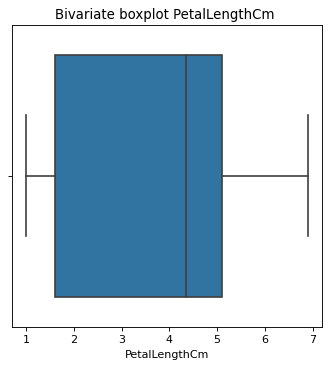

In [11]:
plt.figure(figsize=(5,5),dpi=80)
sns.boxplot(x=data['PetalLengthCm'])
plt.title('Bivariate boxplot PetalLengthCm ')
plt.show()

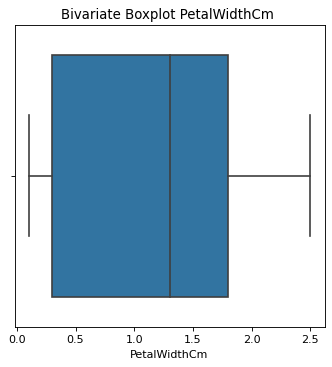

In [12]:
plt.figure(figsize=(5,5), dpi=80 )
sns.boxplot(x=data['PetalWidthCm'] )  
plt.title('Bivariate Boxplot PetalWidthCm ')
plt.show()

In [13]:
import statsmodels.api as sm  
from scipy.stats import shapiro
import scipy.stats as stats 

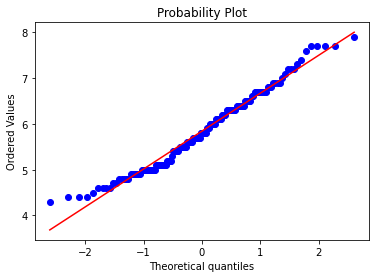

Statistics=0.976, p=0.010
Sample does not look Gaussian (reject H0)


In [14]:
#Checking dataset normality 
#sm.qqplot(data['SepalLengthCm'], line='q')
stats.probplot(data['SepalLengthCm'], dist="norm", plot=plt)
plt.show() 
#Checking Normality using Sahpiro test
stat, p = shapiro(data['SepalLengthCm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)') 

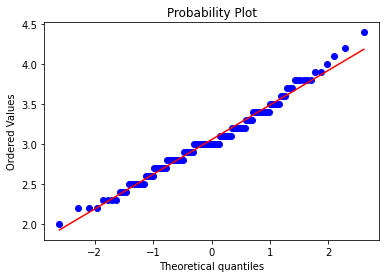

Statistics=0.984, p=0.075
Sample looks Gaussian (fail to reject H0)


In [15]:
# sm.qqplot(data['SepalWidthCm'], line='q')
stats.probplot(data['SepalWidthCm'], dist="norm", plot=plt)

plt.show() 
#'SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'
#Checking Normality using Sahpiro test
stat, p = shapiro(data['SepalWidthCm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)') 

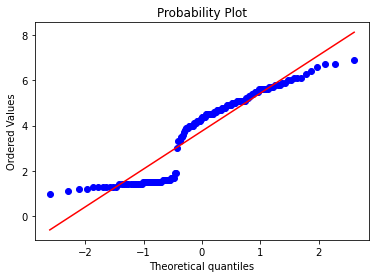

Statistics=0.876, p=0.000
Sample does not look Gaussian (reject H0)


In [16]:
#sm.qqplot(data['PetalLengthCm'], line='q')
stats.probplot(data['PetalLengthCm'], dist="norm", plot=plt)
plt.show()
#Checking Normality using Sahpiro test
stat, p = shapiro(data['PetalLengthCm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)') 

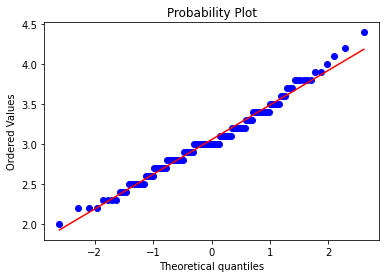

Statistics=0.903, p=0.000
Sample does not look Gaussian (reject H0)


In [17]:
#sm.qqplot(data['PetalWidthCm'], line='q') 
stats.probplot(data['SepalWidthCm'], dist="norm", plot=plt)
plt.show()
#Checking Normality using Sahpiro test
stat, p = shapiro(data['PetalWidthCm'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

In [18]:
from statsmodels.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [19]:
#Checking multicolinearity  
vif = pd.DataFrame()
num_data=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
# point here suspicious variables or just all variables
variables = data[num_data]

df_vif = add_constant(variables)
vif["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(df_vif.shape[1])]
vif["variables"] = df_vif.columns

print(vif)

          VIF      variables
0  130.983718          const
1    7.103113  SepalLengthCm
2    2.099039   SepalWidthCm
3   31.397292  PetalLengthCm
4   16.141564   PetalWidthCm


As we can see, 'PetalLengthCm','PetalWidthCm' have very high values of VIF, indicating that these two variables are highly correlated. Hence, considering these two features together leads to a model with high multicollinearity. We decided to drop  
'PetalLengthCm'.

In [26]:
num_data=['SepalLengthCm','SepalWidthCm','PetalWidthCm']

### 3. Find the optimum number of clusters for K Means

In [20]:
from sklearn.cluster import KMeans

In [27]:
#FInd the optimim number of clusters for k-means classfication 
x=data[num_data].values 

wcss=[] 
n= 20
for i in range (1,20): 
    kmeans=KMeans(n_clusters=i, init= 'k-means++' , max_iter=300, n_init=10, random_state=0) 
    kmeans.fit(x) 
    wcss.append(kmeans.inertia_)

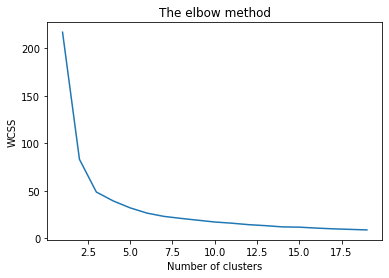

In [28]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, n), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

In [29]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

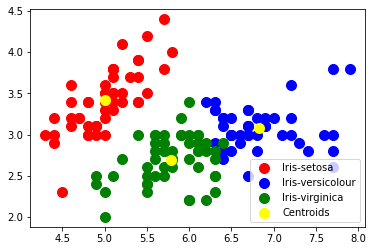

In [30]:
#Visualize clusters   

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()